In [1]:
import pandas as pd
pd.options.display.max_rows = 100
import os

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import wrangle_zillow
from env import get_db_url

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_zillow.get_zillow()

In [3]:
df.head(5)

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [4]:
#using 60/60 first to see what dataset looks like:
print('Before dropping nulls, %d rows, %d cols' % df.shape)

#dropping the cols & rows that do not meet the 60/60 standard
df = wrangle_zillow.handle_missing_values(df, prop_required_column=.6, prop_required_row=.60)
print('After dropping nulls, %d rows, %d cols' % df.shape)

Before dropping nulls, 52319 rows, 68 cols
After dropping nulls, 52319 rows, 34 cols


I lose barely anything and get rid of a lot of bulk, moving forward with removing nulls in columns and removing redundant columns as well. 

In [5]:
df = wrangle_zillow.wrangle_zillow()

In [6]:
df.head(5)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,logerror
0,14297519,3.5,4.0,3100.0,orange,33634931.0,-117869207.0,4506.0,261.0,6.059063e+07,1286.0,96978.0,1998.0,1023282.0,2016.0,0.025595
1,17052889,1.0,2.0,1465.0,ventura,34449266.0,-119281531.0,12647.0,261.0,6.111001e+07,2061.0,97099.0,1967.0,464000.0,2016.0,0.055619
2,14186244,2.0,3.0,1243.0,orange,33886168.0,-117823170.0,8432.0,261.0,6.059022e+07,1286.0,97078.0,1962.0,564778.0,2016.0,0.005383
3,12177905,3.0,4.0,2376.0,los_angeles,34245180.0,-118240722.0,13038.0,261.0,6.037300e+07,3101.0,96330.0,1970.0,145143.0,2016.0,-0.103410
4,12095076,3.0,4.0,2962.0,los_angeles,34145202.0,-118179824.0,63000.0,261.0,6.037461e+07,3101.0,96293.0,1950.0,773303.0,2016.0,-0.001011


In [7]:
df.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
county                           object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcounty                  float64
regionidzip                     float64
yearbuilt                       float64
taxvaluedollarcnt               float64
assessmentyear                  float64
logerror                        float64
dtype: object

In [8]:
### Split data using county for stratify 
train, validate, test = wrangle_zillow.split(df)

train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,assessmentyear,logerror
34657,12702726,4.0,5.0,3202.0,los_angeles,33751923.0,-118338413.0,51829.0,261.0,6.037671e+07,3101.0,96121.0,1956.0,236892.0,2016.0,0.003537
15511,17229912,2.5,4.0,2070.0,ventura,34279557.0,-118753561.0,6652.0,261.0,6.111008e+07,2061.0,97118.0,1968.0,266567.0,2016.0,-0.018836
22695,14070312,1.5,2.0,1338.0,orange,33711801.0,-118003456.0,6007.0,261.0,6.059099e+07,1286.0,96965.0,1961.0,72701.0,2016.0,0.036677
48753,12282520,3.0,4.0,2136.0,los_angeles,33927066.0,-118215508.0,4382.0,261.0,6.037541e+07,3101.0,96113.0,2006.0,193484.0,2016.0,-0.074802
16582,11600371,2.0,2.0,1714.0,los_angeles,34045259.0,-118381551.0,6600.0,261.0,6.037270e+07,3101.0,96016.0,1940.0,187542.0,2016.0,-0.064897


In [9]:
# set alpha 
a = .05

Question 1)

Does logerror differ across county/region of properties?


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

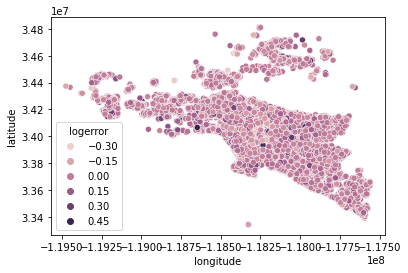

In [10]:
#make a scatter plot for is_outlier
sns.scatterplot(data=train, x='longitude', y='latitude', hue='logerror')

Don't see a specific county being responsible more than another.

H_0: There is no difference of variance or mean between county and logerror

H_1: There is a difference of variance or mean between county and logerror

In [18]:
# if p < alpha:
    # print('\nP is less than alpha. We reject the null hypothesis.')

Question 2)

Is there a relationship between number of baths and logerror?


H_0: There is no relationship between logerror and bathroom count

H_1: There is a relationship of mean between logerror and bathroom count


#creating a joinplot to see if any linear relationship (also adding in county)

print("Is there a relationship\nbetween bathroom count and logerror?")
sns.jointplot(x="bathroomcnt", y="logerror", data=train, hue = 'county')
plt.xlabel("Bathroomcnt")
plt.ylabel("Logerror")
plt.show()

In [17]:
alpha = .05
corr, p = stats.spearmanr(train.bathroomcnt, train.logerror)

if p < alpha:
    print('\nP is less than alpha. We reject the null hypothesis.')


P is less than alpha. We reject the null hypothesis.


Question 3)

Is there a relationship between number of bedroom count, and logerror?

H_0: There is no relationship between logerror and bedroom count

H_1: There is a relationship of mean between logerror and bedroom count

Is there a relationship
between bedroom count and logerror?


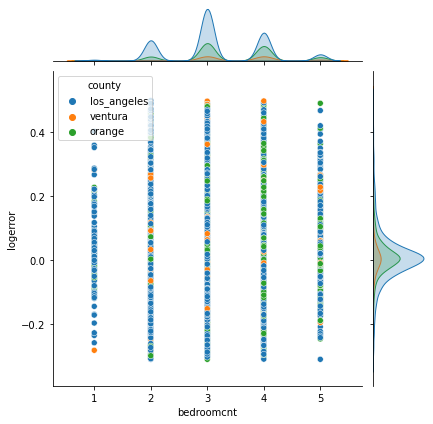

In [20]:
#creating a joinplot to see if any linear relationship (also adding in county)

print("Is there a relationship\nbetween bedroom count and logerror?")
sns.jointplot(x="bedroomcnt", y="logerror", data=train, hue = 'county')
plt.xlabel("Bedroom Count")
plt.ylabel("Logerror")
plt.show()